In [1]:
import pandas as pd
import numpy as np 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import re
import seaborn as sb
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
dataset1=pd.read_csv(r"C:\Users\Vidyajay\Desktop\FAKENEWSDETECTION\SourceCode\Cleaning Data\kaggle.csv")
cols_of_interest=["author","title","text","language","site_url","type","published","uuid"]
fn=dataset1[cols_of_interest]
print(fn.shape)
fn.drop(fn[fn.language!="english"].index,inplace=True)
print(fn.shape)

(12999, 8)
(12403, 8)


C:\Users\Nandini\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [3]:
print(fn.describe())

       author                                              title   text  \
count   10194                                              11723  12357   
unique   2184                                              11109  11835   
top     admin  Get Ready For Civil Unrest: Survey Finds That ...          
freq      247                                                  7    106   

       language   site_url   type                      published  \
count     12403      12403  12403                          12403   
unique        1        237      8                          11535   
top     english  amren.com     bs  2016-10-27T03:00:00.000+03:00   
freq      12403        100  10900                             43   

                                            uuid  
count                                      12403  
unique                                     12403  
top     7ef8a367590cfb44332602777d77767972095255  
freq                                           1  


In [4]:
#fn.text.isnull().sum()
#fn.dropna(subset=['text','title'],inplace=True)

In [5]:
print(fn.type.unique())
print(fn.shape)
fn.head(100)

['bias' 'conspiracy' 'fake' 'bs' 'satire' 'hate' 'junksci' 'state']
(12403, 8)


,author,title,text,language,site_url,type,published,uuid
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,100percentfedup.com,bias,2016-10-26T21:41:00.000+03:00,6a175f46bcd24d39b3e962ad0f29936721db70db
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,100percentfedup.com,bias,2016-10-29T08:47:11.259+03:00,2bdc29d12605ef9cf3f09f9875040a7113be5d5b
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,100percentfedup.com,bias,2016-10-31T01:41:49.479+02:00,c70e149fdd53de5e61c29281100b9de0ed268bc3
3,Fed Up,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,100percentfedup.com,bias,2016-11-01T05:22:00.000+02:00,7cf7c15731ac2a116dd7f629bd57ea468ed70284
4,Fed Up,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,100percentfedup.com,bias,2016-11-01T21:56:00.000+02:00,0206b54719c7e241ffe0ad4315b808290dbe6c0f
5,Barracuda Brigade,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,english,100percentfedup.com,bias,2016-11-02T16:31:28.550+02:00,8f30f5ea14c9d5914a9fe4f55ab2581772af4c31
6,Fed Up,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,100percentfedup.com,bias,2016-11-04T19:40:00.000+02:00,d3cc0fe38f41a59f7c48f8c3528ca5f74193148f
7,Fed Up,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,100percentfedup.com,bias,2016-11-05T01:19:00.000+02:00,b4bbf8b5c19e8864f5257832a58b81ef4ed2d4e4
8,Fed Up,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...,english,100percentfedup.com,bias,2016-11-06T23:54:00.000+02:00,a19aabaa5a61eb8bc22fadaaa003e5fbba5c4bf6
9,Fed Up,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",Email \nThese people are sick and evil. They w...,english,100percentfedup.com,bias,2016-11-07T02:43:00.000+02:00,f54d8e13010d0a79893995ee65360ad4b38b5a35


In [6]:
fn.dropna(subset=['text','title'],inplace=True)
print(fn.shape)
fn.head(100)

(11677, 8)


C:\Users\Nandini\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,author,title,text,language,site_url,type,published,uuid
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,100percentfedup.com,bias,2016-10-26T21:41:00.000+03:00,6a175f46bcd24d39b3e962ad0f29936721db70db
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,100percentfedup.com,bias,2016-10-29T08:47:11.259+03:00,2bdc29d12605ef9cf3f09f9875040a7113be5d5b
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,100percentfedup.com,bias,2016-10-31T01:41:49.479+02:00,c70e149fdd53de5e61c29281100b9de0ed268bc3
3,Fed Up,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,100percentfedup.com,bias,2016-11-01T05:22:00.000+02:00,7cf7c15731ac2a116dd7f629bd57ea468ed70284
4,Fed Up,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,100percentfedup.com,bias,2016-11-01T21:56:00.000+02:00,0206b54719c7e241ffe0ad4315b808290dbe6c0f
5,Barracuda Brigade,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,english,100percentfedup.com,bias,2016-11-02T16:31:28.550+02:00,8f30f5ea14c9d5914a9fe4f55ab2581772af4c31
6,Fed Up,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,100percentfedup.com,bias,2016-11-04T19:40:00.000+02:00,d3cc0fe38f41a59f7c48f8c3528ca5f74193148f
7,Fed Up,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,100percentfedup.com,bias,2016-11-05T01:19:00.000+02:00,b4bbf8b5c19e8864f5257832a58b81ef4ed2d4e4
8,Fed Up,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...,english,100percentfedup.com,bias,2016-11-06T23:54:00.000+02:00,a19aabaa5a61eb8bc22fadaaa003e5fbba5c4bf6
9,Fed Up,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",Email \nThese people are sick and evil. They w...,english,100percentfedup.com,bias,2016-11-07T02:43:00.000+02:00,f54d8e13010d0a79893995ee65360ad4b38b5a35


In [7]:
fn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11677 entries, 0 to 12912
Data columns (total 8 columns):
author       9514 non-null object
title        11677 non-null object
text         11677 non-null object
language     11677 non-null object
site_url     11677 non-null object
type         11677 non-null object
published    11677 non-null object
uuid         11677 non-null object
dtypes: object(8)
memory usage: 821.0+ KB


In [8]:
df=fn
df['fakeness'] = 1
df.head(60)

C:\Users\Nandini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,author,title,text,language,site_url,type,published,uuid,fakeness
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,100percentfedup.com,bias,2016-10-26T21:41:00.000+03:00,6a175f46bcd24d39b3e962ad0f29936721db70db,1
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,100percentfedup.com,bias,2016-10-29T08:47:11.259+03:00,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,1
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,100percentfedup.com,bias,2016-10-31T01:41:49.479+02:00,c70e149fdd53de5e61c29281100b9de0ed268bc3,1
3,Fed Up,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,100percentfedup.com,bias,2016-11-01T05:22:00.000+02:00,7cf7c15731ac2a116dd7f629bd57ea468ed70284,1
4,Fed Up,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,100percentfedup.com,bias,2016-11-01T21:56:00.000+02:00,0206b54719c7e241ffe0ad4315b808290dbe6c0f,1
5,Barracuda Brigade,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,english,100percentfedup.com,bias,2016-11-02T16:31:28.550+02:00,8f30f5ea14c9d5914a9fe4f55ab2581772af4c31,1
6,Fed Up,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,100percentfedup.com,bias,2016-11-04T19:40:00.000+02:00,d3cc0fe38f41a59f7c48f8c3528ca5f74193148f,1
7,Fed Up,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,100percentfedup.com,bias,2016-11-05T01:19:00.000+02:00,b4bbf8b5c19e8864f5257832a58b81ef4ed2d4e4,1
8,Fed Up,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...,english,100percentfedup.com,bias,2016-11-06T23:54:00.000+02:00,a19aabaa5a61eb8bc22fadaaa003e5fbba5c4bf6,1
9,Fed Up,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",Email \nThese people are sick and evil. They w...,english,100percentfedup.com,bias,2016-11-07T02:43:00.000+02:00,f54d8e13010d0a79893995ee65360ad4b38b5a35,1


In [13]:
df=df.head(3)
df.head()

,author,title,text,language,site_url,type,published,uuid,fakeness
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,100percentfedup.com,bias,2016-10-26T21:41:00.000+03:00,6a175f46bcd24d39b3e962ad0f29936721db70db,1
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,100percentfedup.com,bias,2016-10-29T08:47:11.259+03:00,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,1
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,100percentfedup.com,bias,2016-10-31T01:41:49.479+02:00,c70e149fdd53de5e61c29281100b9de0ed268bc3,1


In [16]:

tdf = TfidfVectorizer(stop_words='english',ngram_range=(1,2) )
df=df.head(100)
vectorizer = tdf.fit(df.text)
transformed_text = vectorizer.transform(df.text)
transformed_title = vectorizer.transform(df.title)

 def get_tfidf_term_scores(feature_names):
    '''Returns dictionary with term names and total tfidf scores for all terms in corpus'''
    term_corpus_dict = {}
    # iterate through term index and term 
    for term_ind, term in enumerate(feature_names):
        term_name = feature_names[term_ind]
        term_corpus_dict[term_name] = np.sum(transformed_title.T[term_ind].toarray())
        
    return term_corpus_dict

# list of features created by tfidf
#feature_names = tdf.get_feature_names()

#term_corpus_dict = get_tfidf_term_scores(feature_names)
def get_sorted_tfidf_scores(term_corpus_dict):
     #Returns sort words from highest score to lowest score sort indices from words with highest score to lowest score
    sortedIndices = np.argsort( list(term_corpus_dict.values()))[::-1]
    # move words and score out of dicts and into arrays
    termNames = np.array(list(term_corpus_dict.keys()))
    scores = np.array(list(term_corpus_dict.values()))
    # sort words and scores
    termNames = termNames[sortedIndices]
    scores = scores[sortedIndices]
    return termNames, scores


#termNames, scores = get_sorted_tfidf_scores(term_corpus_dict)
print(tdf.get_feature_names())
print("/n/n/n")
print(tdf.vocabulary_)

['10', '10 28', '10 months', '100percentfedup', '100percentfedup com', '2016', '2016 10', '24', '24 response', '28', '28 print', '5th', '5th recall', 'abedin', 'abedin cooperating', 'according', 'according lawmakers', 'accusations', 'accusations lynch', 'administration', 'administration blocking', 'administration secret', 'agreement', 'agreement testify', 'aimed', 'aimed freeing', 'air', 'air colleague', 'allow', 'allow contents', 'amendment', 'amendment avoid', 'american', 'american hostages', 'answer', 'answer just', 'answer questions', 'anthony', 'anthony weiner', 'approved', 'approved delivered', 'asap', 'asap did', 'ass', 'ass loretta', 'assistant', 'assistant attorney', 'attorney', 'attorney general', 'avoid', 'avoid incriminating', 'baier', 'baier just', 'barracuda', 'barracuda brigade', 'barred', 'barred publicly', 'based', 'based agreement', 'beacon', 'beacon sen', 'behalf', 'behalf refusing', 'believe', 'believe prosecutor', 'benefits', 'benefits just', 'billion', 'billion ca

In [13]:
def plot_tfidf_scores(scores,termNames, n_words = 18):
    # Create a figure instance, and the two subplots
    fig = plt.figure(figsize = (14, 18))
    
    override = {'fontsize': 'large'}

    fig.add_subplot(221)   
    n_words = 75
    sb.set()
    sb.barplot(x = scores[:n_words], y = termNames[:n_words]);
    plt.title("TFIDF - Importance of Top {0} Terms".format(n_words));
    plt.xlabel("TFIDF Score");

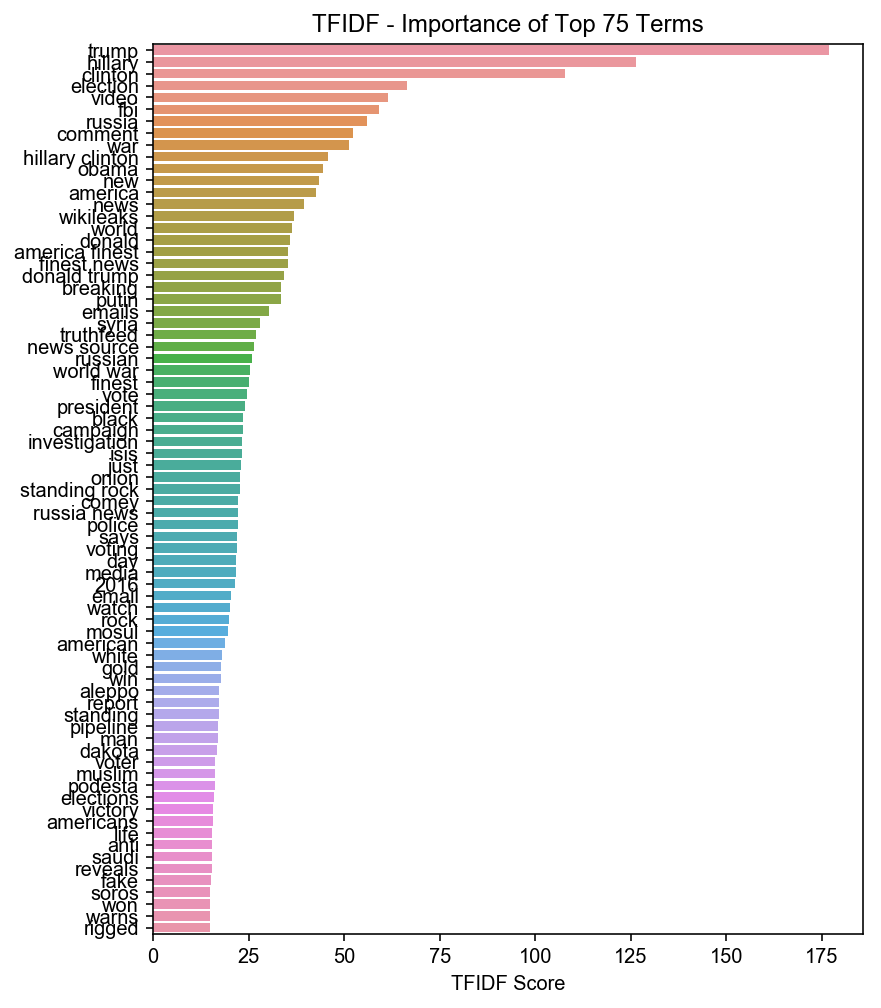

In [14]:
plot_tfidf_scores(scores, termNames,  n_words = 18)

In [18]:
# Saving it for the future use
df.to_csv("C:/Users/Vidyajay/Desktop/FAKENESDETECTION/SourceCode/Cleaning Data/kaggle cleaned.csv")